In [2]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
combined_data = pd.read_csv('final_combined.csv')

In [4]:
combined_data.head()

,brand_uuid,id,full_name,company_slug,slug,email,job_title,location,is_c_level,working_since,...,sudden_growth_score,sudden_growth_delta,acceleration_score,success_score,is_physical_products_brand,is_brickandmortar,founded,employees_count,generic_reseller,store_is_subdomain
0,motorola,2015583,Michaël Maarek,motorola-mobility,michaelmaarek,lemike10@gmail.com,Key Account Director,"London, United Kingdom",0.0,2014-08-01 00:00:00+00:00,...,-8.7785,-72.5444,46.6345,84.323,1.0,1.0,2017.0,26954.0,0.0,False
1,motorola,2048222,Michael Roberts,motorola-mobility,michaelroberts07,msajs.roberts@gmail.com,Sr. Director of Product Strategy and Business ...,Greater San Diego Area,0.0,2010-08-01 00:00:00+00:00,...,-8.7785,-72.5444,46.6345,84.323,1.0,1.0,2017.0,26954.0,0.0,False
2,motorola,60552,Pratod Kasbekar,motorola-mobility,pratod-kasbekar-a088b64,pkasbekar@verizon.net,Senior Director of Program Management/Engineering,United States,0.0,2006-01-01 00:00:00+00:00,...,-8.7785,-72.5444,46.6345,84.323,1.0,1.0,2017.0,26954.0,0.0,False
3,motorola,60545,Pamela Ajaibela,motorola-mobility,pamelaajaibela,pamelapajaibela@gmail.com,Director,San Francisco Bay Area,0.0,2007-02-01 00:00:00+00:00,...,-8.7785,-72.5444,46.6345,84.323,1.0,1.0,2017.0,26954.0,0.0,False
4,motorola,60546,paul burnett,NaN,paul-burnett-73189b23,pburnett66@rogers.com,Channel Director,Canada,0.0,NaN,...,-8.7785,-72.5444,46.6345,84.323,1.0,1.0,2017.0,26954.0,0.0,False


In [5]:
combined_data.columns #columns in the dataframe

Index(['brand_uuid', 'id', 'full_name', 'company_slug', 'slug', 'email',
       'job_title', 'location', 'is_c_level', 'working_since', 'working_until',
       'is_current', 'working_until ', 'brand_id', 'brand_name',
       'growth_score', 'sudden_growth_score', 'sudden_growth_delta',
       'acceleration_score', 'success_score', 'is_physical_products_brand',
       'is_brickandmortar', 'founded', 'employees_count', 'generic_reseller',
       'store_is_subdomain'],
      dtype='object')

In [6]:
#number of unique full names, slugs, email in the dataframe to choose which would be best to group by
print('Number of unique names: ', combined_data['full_name'].nunique())
print('Number of unique slugs (from LinkedIn): ', combined_data['slug'].nunique())
print('Number of unique email ids: ', combined_data['email'].nunique())

#number of null valuesin names, slugs (not considering email anymore, since we seem to have very less data in that column)
print('Null values in full name is ', combined_data['full_name'].isna().sum())
print('Null values in slug is ', combined_data['slug'].isna().sum())

Number of unique names:  1350963
Number of unique slugs (from LinkedIn):  1459705
Number of unique email ids:  598327
Null values in full name is  2
Null values in slug is  5957


In [7]:
#Drop the rows with null value in the 'slug column', check the null values and unique values again
combined_data.dropna(subset=['slug'], inplace=True)
#combined_data = combined_data[combined_data['slug'].notnull()]
print('Null values in slug is ', combined_data['slug'].isna().sum())
print('Number of unique slugs (from LinkedIn): ', combined_data['slug'].nunique())

Null values in slug is  0
Number of unique slugs (from LinkedIn):  1459705


In [8]:
#Drop the rows with null value in the 'full_name' column, check the null values and unique values again
combined_data.dropna(subset=['full_name'], inplace=True)

print('Null values in full name is ', combined_data['full_name'].isna().sum())
print('Number of unique full names : ', combined_data['slug'].nunique())

Null values in full name is  0
Number of unique full names :  1459704


In [9]:
#want to check number of unique job titles, this is to check if we can afford converting them to categorical variables
print('Number of unique job titles is ', combined_data['job_title'].nunique())

Number of unique job titles is  714331


In [10]:
#filling in the working_since column
combined_data.loc[((combined_data['working_since'].isnull()) & (combined_data['is_current'] == True)), 'working_since'] = combined_data['founded'] 

In [11]:
combined_data.isnull().sum()

brand_uuid                       484
id                                 0
full_name                          0
company_slug                  637537
slug                               0
email                         898656
job_title                         74
location                      135788
is_c_level                         0
working_since                  11925
working_until                      0
is_current                         0
working_until                 203562
brand_id                           0
brand_name                        35
growth_score                       0
sudden_growth_score                0
sudden_growth_delta                0
acceleration_score                 0
success_score                      0
is_physical_products_brand       355
is_brickandmortar                486
founded                        32661
employees_count               961897
generic_reseller                   0
store_is_subdomain                 0
dtype: int64

In [12]:
#convert both working_since and working_until to date time format
combined_data['working_since'] = pd.to_datetime(combined_data['working_since'], utc = True)
combined_data['working_until'] = pd.to_datetime(combined_data['working_until'], utc = True)

combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1546517 entries, 0 to 1552474
Data columns (total 26 columns):
 #   Column                      Non-Null Count    Dtype              
---  ------                      --------------    -----              
 0   brand_uuid                  1546033 non-null  object             
 1   id                          1546517 non-null  int64              
 2   full_name                   1546517 non-null  object             
 3   company_slug                908980 non-null   object             
 4   slug                        1546517 non-null  object             
 5   email                       647861 non-null   object             
 6   job_title                   1546443 non-null  object             
 7   location                    1410729 non-null  object             
 8   is_c_level                  1546517 non-null  float64            
 9   working_since               1534592 non-null  datetime64[ns, UTC]
 10  working_until               15

In [13]:
combined_data['time_worked'] = combined_data['working_until'] - combined_data['working_since']

In [14]:
combined_data['days_worked'] = combined_data['time_worked'].dt.days

combined_data.head()

,brand_uuid,id,full_name,company_slug,slug,email,job_title,location,is_c_level,working_since,...,acceleration_score,success_score,is_physical_products_brand,is_brickandmortar,founded,employees_count,generic_reseller,store_is_subdomain,time_worked,days_worked
0,motorola,2015583,Michaël Maarek,motorola-mobility,michaelmaarek,lemike10@gmail.com,Key Account Director,"London, United Kingdom",0.0,2014-08-01 00:00:00+00:00,...,46.6345,84.323,1.0,1.0,2017.0,26954.0,0.0,False,853 days 00:00:00,853.0
1,motorola,2048222,Michael Roberts,motorola-mobility,michaelroberts07,msajs.roberts@gmail.com,Sr. Director of Product Strategy and Business ...,Greater San Diego Area,0.0,2010-08-01 00:00:00+00:00,...,46.6345,84.323,1.0,1.0,2017.0,26954.0,0.0,False,731 days 00:00:00,731.0
2,motorola,60552,Pratod Kasbekar,motorola-mobility,pratod-kasbekar-a088b64,pkasbekar@verizon.net,Senior Director of Program Management/Engineering,United States,0.0,2006-01-01 00:00:00+00:00,...,46.6345,84.323,1.0,1.0,2017.0,26954.0,0.0,False,5296 days 14:22:30,5296.0
3,motorola,60545,Pamela Ajaibela,motorola-mobility,pamelaajaibela,pamelapajaibela@gmail.com,Director,San Francisco Bay Area,0.0,2007-02-01 00:00:00+00:00,...,46.6345,84.323,1.0,1.0,2017.0,26954.0,0.0,False,4900 days 14:22:30,4900.0
4,motorola,60546,paul burnett,NaN,paul-burnett-73189b23,pburnett66@rogers.com,Channel Director,Canada,0.0,1970-01-01 00:00:00.000002017+00:00,...,46.6345,84.323,1.0,1.0,2017.0,26954.0,0.0,False,18445 days 14:22:29.999997,18445.0


In [15]:
#convert founded column to date time format
combined_data['founded_date'] = pd.to_datetime(combined_data['founded'], utc = True)

#checking datetime object
from datetime import datetime

# datetime object containing current date and time
now = datetime.now()
 
print("now =", now) 

now = 2020-07-02 21:26:43.337074


In [16]:
combined_data['today'] = now
combined_data.head()

,brand_uuid,id,full_name,company_slug,slug,email,job_title,location,is_c_level,working_since,...,is_physical_products_brand,is_brickandmortar,founded,employees_count,generic_reseller,store_is_subdomain,time_worked,days_worked,founded_date,today
0,motorola,2015583,Michaël Maarek,motorola-mobility,michaelmaarek,lemike10@gmail.com,Key Account Director,"London, United Kingdom",0.0,2014-08-01 00:00:00+00:00,...,1.0,1.0,2017.0,26954.0,0.0,False,853 days 00:00:00,853.0,1970-01-01 00:00:00.000002017+00:00,2020-07-02 21:26:43.337074
1,motorola,2048222,Michael Roberts,motorola-mobility,michaelroberts07,msajs.roberts@gmail.com,Sr. Director of Product Strategy and Business ...,Greater San Diego Area,0.0,2010-08-01 00:00:00+00:00,...,1.0,1.0,2017.0,26954.0,0.0,False,731 days 00:00:00,731.0,1970-01-01 00:00:00.000002017+00:00,2020-07-02 21:26:43.337074
2,motorola,60552,Pratod Kasbekar,motorola-mobility,pratod-kasbekar-a088b64,pkasbekar@verizon.net,Senior Director of Program Management/Engineering,United States,0.0,2006-01-01 00:00:00+00:00,...,1.0,1.0,2017.0,26954.0,0.0,False,5296 days 14:22:30,5296.0,1970-01-01 00:00:00.000002017+00:00,2020-07-02 21:26:43.337074
3,motorola,60545,Pamela Ajaibela,motorola-mobility,pamelaajaibela,pamelapajaibela@gmail.com,Director,San Francisco Bay Area,0.0,2007-02-01 00:00:00+00:00,...,1.0,1.0,2017.0,26954.0,0.0,False,4900 days 14:22:30,4900.0,1970-01-01 00:00:00.000002017+00:00,2020-07-02 21:26:43.337074
4,motorola,60546,paul burnett,NaN,paul-burnett-73189b23,pburnett66@rogers.com,Channel Director,Canada,0.0,1970-01-01 00:00:00.000002017+00:00,...,1.0,1.0,2017.0,26954.0,0.0,False,18445 days 14:22:29.999997,18445.0,1970-01-01 00:00:00.000002017+00:00,2020-07-02 21:26:43.337074


In [17]:
#convert today column to date time format
combined_data['today'] = pd.to_datetime(combined_data['today'], utc = True)

#create column with age of company
combined_data['age_of_brand'] = combined_data['today'] - combined_data['founded_date']

#column with age of brand in days
combined_data['age_brand_in_days'] = combined_data['age_of_brand'].dt.days

#column with new feature : experience with brand ratio
combined_data['experience_w_brand_ratio'] = combined_data['days_worked'] / combined_data['age_brand_in_days']

#checking head of dataframe
combined_data.head()

,brand_uuid,id,full_name,company_slug,slug,email,job_title,location,is_c_level,working_since,...,employees_count,generic_reseller,store_is_subdomain,time_worked,days_worked,founded_date,today,age_of_brand,age_brand_in_days,experience_w_brand_ratio
0,motorola,2015583,Michaël Maarek,motorola-mobility,michaelmaarek,lemike10@gmail.com,Key Account Director,"London, United Kingdom",0.0,2014-08-01 00:00:00+00:00,...,26954.0,0.0,False,853 days 00:00:00,853.0,1970-01-01 00:00:00.000002017+00:00,2020-07-02 21:26:43.337074+00:00,18445 days 21:26:43.337071,18445.0,0.046246
1,motorola,2048222,Michael Roberts,motorola-mobility,michaelroberts07,msajs.roberts@gmail.com,Sr. Director of Product Strategy and Business ...,Greater San Diego Area,0.0,2010-08-01 00:00:00+00:00,...,26954.0,0.0,False,731 days 00:00:00,731.0,1970-01-01 00:00:00.000002017+00:00,2020-07-02 21:26:43.337074+00:00,18445 days 21:26:43.337071,18445.0,0.039631
2,motorola,60552,Pratod Kasbekar,motorola-mobility,pratod-kasbekar-a088b64,pkasbekar@verizon.net,Senior Director of Program Management/Engineering,United States,0.0,2006-01-01 00:00:00+00:00,...,26954.0,0.0,False,5296 days 14:22:30,5296.0,1970-01-01 00:00:00.000002017+00:00,2020-07-02 21:26:43.337074+00:00,18445 days 21:26:43.337071,18445.0,0.287124
3,motorola,60545,Pamela Ajaibela,motorola-mobility,pamelaajaibela,pamelapajaibela@gmail.com,Director,San Francisco Bay Area,0.0,2007-02-01 00:00:00+00:00,...,26954.0,0.0,False,4900 days 14:22:30,4900.0,1970-01-01 00:00:00.000002017+00:00,2020-07-02 21:26:43.337074+00:00,18445 days 21:26:43.337071,18445.0,0.265655
4,motorola,60546,paul burnett,NaN,paul-burnett-73189b23,pburnett66@rogers.com,Channel Director,Canada,0.0,1970-01-01 00:00:00.000002017+00:00,...,26954.0,0.0,False,18445 days 14:22:29.999997,18445.0,1970-01-01 00:00:00.000002017+00:00,2020-07-02 21:26:43.337074+00:00,18445 days 21:26:43.337071,18445.0,1.000000


In [18]:
combined_data.columns

Index(['brand_uuid', 'id', 'full_name', 'company_slug', 'slug', 'email',
       'job_title', 'location', 'is_c_level', 'working_since', 'working_until',
       'is_current', 'working_until ', 'brand_id', 'brand_name',
       'growth_score', 'sudden_growth_score', 'sudden_growth_delta',
       'acceleration_score', 'success_score', 'is_physical_products_brand',
       'is_brickandmortar', 'founded', 'employees_count', 'generic_reseller',
       'store_is_subdomain', 'time_worked', 'days_worked', 'founded_date',
       'today', 'age_of_brand', 'age_brand_in_days',
       'experience_w_brand_ratio'],
      dtype='object')

In [19]:
#dropping unneccesary columns

columns_to_drop = ['time_worked', 'today', 'age_of_brand', 'founded_date']

for col in columns_to_drop:
    combined_data.drop(col, axis =1, inplace =True)
combined_data.head() 

,brand_uuid,id,full_name,company_slug,slug,email,job_title,location,is_c_level,working_since,...,success_score,is_physical_products_brand,is_brickandmortar,founded,employees_count,generic_reseller,store_is_subdomain,days_worked,age_brand_in_days,experience_w_brand_ratio
0,motorola,2015583,Michaël Maarek,motorola-mobility,michaelmaarek,lemike10@gmail.com,Key Account Director,"London, United Kingdom",0.0,2014-08-01 00:00:00+00:00,...,84.323,1.0,1.0,2017.0,26954.0,0.0,False,853.0,18445.0,0.046246
1,motorola,2048222,Michael Roberts,motorola-mobility,michaelroberts07,msajs.roberts@gmail.com,Sr. Director of Product Strategy and Business ...,Greater San Diego Area,0.0,2010-08-01 00:00:00+00:00,...,84.323,1.0,1.0,2017.0,26954.0,0.0,False,731.0,18445.0,0.039631
2,motorola,60552,Pratod Kasbekar,motorola-mobility,pratod-kasbekar-a088b64,pkasbekar@verizon.net,Senior Director of Program Management/Engineering,United States,0.0,2006-01-01 00:00:00+00:00,...,84.323,1.0,1.0,2017.0,26954.0,0.0,False,5296.0,18445.0,0.287124
3,motorola,60545,Pamela Ajaibela,motorola-mobility,pamelaajaibela,pamelapajaibela@gmail.com,Director,San Francisco Bay Area,0.0,2007-02-01 00:00:00+00:00,...,84.323,1.0,1.0,2017.0,26954.0,0.0,False,4900.0,18445.0,0.265655
4,motorola,60546,paul burnett,NaN,paul-burnett-73189b23,pburnett66@rogers.com,Channel Director,Canada,0.0,1970-01-01 00:00:00.000002017+00:00,...,84.323,1.0,1.0,2017.0,26954.0,0.0,False,18445.0,18445.0,1.000000


In [20]:
#group by name(slug is unique)
group_by_slug = combined_data.groupby('slug')

#counting the number of unique companies one person is associated
combined_data['num_brand_count'] = group_by_slug['brand_name'].transform('count')
combined_data.head()

,brand_uuid,id,full_name,company_slug,slug,email,job_title,location,is_c_level,working_since,...,is_physical_products_brand,is_brickandmortar,founded,employees_count,generic_reseller,store_is_subdomain,days_worked,age_brand_in_days,experience_w_brand_ratio,num_brand_count
0,motorola,2015583,Michaël Maarek,motorola-mobility,michaelmaarek,lemike10@gmail.com,Key Account Director,"London, United Kingdom",0.0,2014-08-01 00:00:00+00:00,...,1.0,1.0,2017.0,26954.0,0.0,False,853.0,18445.0,0.046246,3
1,motorola,2048222,Michael Roberts,motorola-mobility,michaelroberts07,msajs.roberts@gmail.com,Sr. Director of Product Strategy and Business ...,Greater San Diego Area,0.0,2010-08-01 00:00:00+00:00,...,1.0,1.0,2017.0,26954.0,0.0,False,731.0,18445.0,0.039631,2
2,motorola,60552,Pratod Kasbekar,motorola-mobility,pratod-kasbekar-a088b64,pkasbekar@verizon.net,Senior Director of Program Management/Engineering,United States,0.0,2006-01-01 00:00:00+00:00,...,1.0,1.0,2017.0,26954.0,0.0,False,5296.0,18445.0,0.287124,1
3,motorola,60545,Pamela Ajaibela,motorola-mobility,pamelaajaibela,pamelapajaibela@gmail.com,Director,San Francisco Bay Area,0.0,2007-02-01 00:00:00+00:00,...,1.0,1.0,2017.0,26954.0,0.0,False,4900.0,18445.0,0.265655,1
4,motorola,60546,paul burnett,NaN,paul-burnett-73189b23,pburnett66@rogers.com,Channel Director,Canada,0.0,1970-01-01 00:00:00.000002017+00:00,...,1.0,1.0,2017.0,26954.0,0.0,False,18445.0,18445.0,1.000000,1


In [21]:
combined_data['num_brand_count'].value_counts()

1      1388664
2       119685
3        25023
4         8004
5         2825
6          978
7          336
172        172
8          160
86          86
9           81
67          67
50          50
49          49
47          47
22          44
19          38
34          34
0           33
30          30
15          30
21          21
20          20
18          18
12          12
10          10
Name: num_brand_count, dtype: int64

In [22]:
#Only keep the rows where number of brand count is between 1 and 9
combined_data = combined_data[(combined_data['num_brand_count'] <=9) & (combined_data['num_brand_count'] >=1)]

combined_data['num_brand_count'].value_counts()

1    1388664
2     119685
3      25023
4       8004
5       2825
6        978
7        336
8        160
9         81
Name: num_brand_count, dtype: int64

In [23]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1545756 entries, 0 to 1552474
Data columns (total 30 columns):
 #   Column                      Non-Null Count    Dtype              
---  ------                      --------------    -----              
 0   brand_uuid                  1545272 non-null  object             
 1   id                          1545756 non-null  int64              
 2   full_name                   1545756 non-null  object             
 3   company_slug                908954 non-null   object             
 4   slug                        1545756 non-null  object             
 5   email                       647854 non-null   object             
 6   job_title                   1545682 non-null  object             
 7   location                    1410684 non-null  object             
 8   is_c_level                  1545756 non-null  float64            
 9   working_since               1533850 non-null  datetime64[ns, UTC]
 10  working_until               15

In [24]:
%%time
#create a list of important executive positions so we can search them in the job title column
responsible_positions = {'chairman of board':6, 'founder':9,
                        #'chief executive officer', 'ceo', 'chief operating officer', 'coo', 'chief financial officer', 'cfo', 
                        #'chief information officer', 'cio', 'chief innovation officer', 'chief strategy officer', 'cso', 
                        #'chief commercial officer', 'cco', 'chief knowledge officer', 'cko', 'chief security officer', 'cso', 
                        #'chief automation officer', 'cao', 'chief intellectual property officer', 'cipo', 'chief compliance officer',
                        #'chief marketing officer', 'cmo', 'chief talent officer', 'cto', 'chief human resources officer', 'chro', 
                         #'chief user experience officer', 'cueo',
                         'president' :7.5, 'partner' : 7, 'vp' :5.5, 'director':4 , 'manager' :2}
#create columns for each of these positions
for key,value in responsible_positions.items():
    combined_data[key] = combined_data['job_title'].str.lower().str.contains(key)  

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


CPU times: user 11.8 s, sys: 506 ms, total: 12.3 s
Wall time: 12.3 s


In [26]:
#pretty straightforward, we are replacing the true or False values by 1 or 0
for key, value in responsible_positions.items():
    combined_data[key] = combined_data[key].replace({True : value, False : 0})
combined_data.head() 

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


,brand_uuid,id,full_name,company_slug,slug,email,job_title,location,is_c_level,working_since,...,age_brand_in_days,experience_w_brand_ratio,num_brand_count,chairman of board,founder,president,partner,vp,director,manager
0,motorola,2015583,Michaël Maarek,motorola-mobility,michaelmaarek,lemike10@gmail.com,Key Account Director,"London, United Kingdom",0.0,2014-08-01 00:00:00+00:00,...,18445.0,0.046246,3,0.0,0.0,0.0,0.0,0.0,4.0,0.0
1,motorola,2048222,Michael Roberts,motorola-mobility,michaelroberts07,msajs.roberts@gmail.com,Sr. Director of Product Strategy and Business ...,Greater San Diego Area,0.0,2010-08-01 00:00:00+00:00,...,18445.0,0.039631,2,0.0,0.0,0.0,0.0,0.0,4.0,0.0
2,motorola,60552,Pratod Kasbekar,motorola-mobility,pratod-kasbekar-a088b64,pkasbekar@verizon.net,Senior Director of Program Management/Engineering,United States,0.0,2006-01-01 00:00:00+00:00,...,18445.0,0.287124,1,0.0,0.0,0.0,0.0,0.0,4.0,0.0
3,motorola,60545,Pamela Ajaibela,motorola-mobility,pamelaajaibela,pamelapajaibela@gmail.com,Director,San Francisco Bay Area,0.0,2007-02-01 00:00:00+00:00,...,18445.0,0.265655,1,0.0,0.0,0.0,0.0,0.0,4.0,0.0
4,motorola,60546,paul burnett,NaN,paul-burnett-73189b23,pburnett66@rogers.com,Channel Director,Canada,0.0,1970-01-01 00:00:00.000002017+00:00,...,18445.0,1.000000,1,0.0,0.0,0.0,0.0,0.0,4.0,0.0


In [27]:
#create a position weight for each employee
combined_data['position_weight'] = combined_data['chairman of board'] + combined_data['founder'] +combined_data['president'] + combined_data['partner'] + combined_data['vp'] +combined_data['director'] +combined_data['manager']

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [29]:
#Check for missing values in position weight

combined_data['position_weight'].isnull().sum()

74

In [30]:
#drop these 70 rows where the position weight is not defined
combined_data.dropna(subset=['position_weight'], inplace = True)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [31]:
#settle the position weight correctly for vice president
combined_data.loc[(combined_data['job_title'].str.lower().str.contains('vp') ), 'position_weight'] = 5.5
combined_data.loc[((combined_data['job_title'].str.lower().str.contains('vice')) & (combined_data['position_weight'] == 7.5)), 'position_weight'] = 5.5

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [32]:
# Settle the position weight for c-level employees like 'chief .... officer'. We can already identify these people through is_c_level column


combined_data.loc[(combined_data['is_c_level'] ==1), 'position_weight'] = 8

#adjusting the position weights of associate/ assistant vice president, senior director, assisatant director, senior manager
combined_data.loc[((combined_data['job_title'].str.lower().str.contains('associate')) & (combined_data['position_weight'] == 5.5)), 'position_weight'] = 5
combined_data.loc[((combined_data['job_title'].str.lower().str.contains('assistant')) & (combined_data['position_weight'] == 5.5)), 'position_weight'] = 5
combined_data.loc[((combined_data['job_title'].str.lower().str.contains('senior')) & (combined_data['position_weight'] == 4)), 'position_weight'] = 4.5
combined_data.loc[((combined_data['job_title'].str.lower().str.contains('assistant')) & (combined_data['position_weight'] == 4)), 'position_weight'] = 3
combined_data.loc[((combined_data['job_title'].str.lower().str.contains('senior')) & (combined_data['position_weight'] == 2)), 'position_weight'] = 4.5

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [34]:
#what are the different range of values associated to the position weight of each employee?
combined_data['position_weight'].value_counts()

0.0     781178
8.0     286223
2.0     265077
4.0     153421
5.5      25266
4.5      13565
7.0       9974
9.0       2916
3.0       1709
6.0       1695
11.0      1409
7.5       1194
13.0       821
5.0        449
11.5       250
9.5        215
14.5       158
16.0        89
16.5        33
15.0        12
20.5        10
18.0         6
18.5         5
20.0         4
13.5         3
Name: position_weight, dtype: int64

In [36]:
combined_data[combined_data['position_weight'] == 20]

,brand_uuid,id,full_name,company_slug,slug,email,job_title,location,is_c_level,working_since,...,experience_w_brand_ratio,num_brand_count,chairman of board,founder,president,partner,vp,director,manager,position_weight
70677,albertaelectronicmusic,582280,Andrew Williams,alberta-electronic-music,andrewwilliamscanada,andrewtwilliams2@hotmail.com,"Co-Founder, Director of Partnerships and Commu...","Edmonton, Alberta, Canada",0.0,2016-03-01 00:00:00+00:00,...,0.085877,1,0.0,9.0,0.0,7.0,0.0,4.0,0.0,20.0
155336,secretlab,32505,Alaric Choo,secretlabsgpteltd,alaric-choo-946b1868,NaN,"Co Founder, Technical & Partnerships Director",Singapore,0.0,2014-12-01 00:00:00+00:00,...,0.110599,1,0.0,9.0,0.0,7.0,0.0,4.0,0.0,20.0
383159,houseofyes,1915865,Kae Burke,houseofyesnyc,kae-burke-5724496a,NaN,Co Founder- Creative Director & Partner,"Brooklyn, New York",0.0,2007-07-01 00:00:00+00:00,...,NaN,1,0.0,9.0,0.0,7.0,0.0,4.0,0.0,20.0
1163708,chickenpink,512837,Rupert Dickinson,chickenpink,rupert-dickinson-8b257014,rupert.dickinson@masecopw.com,"Co-Founder, Partner and Managing Director","Plymouth, United Kingdom",0.0,2016-09-01 00:00:00+00:00,...,0.075901,1,0.0,9.0,0.0,7.0,0.0,4.0,0.0,20.0


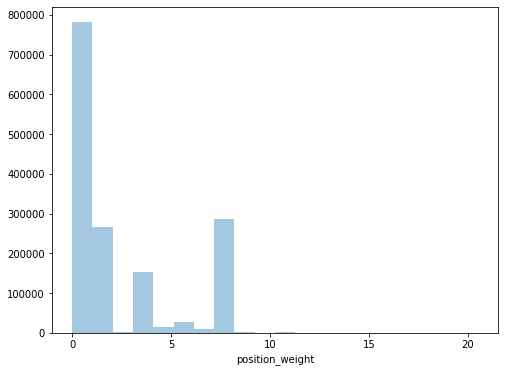

In [37]:
#let's see this via distplot in seaborn
plt.figure(figsize =(8,6))
sns.distplot(combined_data['position_weight'], kde = False, bins =20)

In [38]:
combined_data.isnull().sum()

brand_uuid                       484
id                                 0
full_name                          0
company_slug                  636780
slug                               0
email                         897851
job_title                          0
location                      135072
is_c_level                         0
working_since                  11905
working_until                      0
is_current                         0
working_until                 203534
brand_id                           0
brand_name                         2
growth_score                       0
sudden_growth_score                0
sudden_growth_delta                0
acceleration_score                 0
success_score                      0
is_physical_products_brand       355
is_brickandmortar                486
founded                        32639
employees_count               961333
generic_reseller                   0
store_is_subdomain                 0
days_worked                    11905
a

In [40]:
#Drop the columns which won't value to the model or our calculations right now
combined_data.drop('employees_count', axis = 1, inplace =True)
combined_data.drop('email', axis = 1, inplace =True)
combined_data.drop('location', axis = 1, inplace =True)
combined_data.drop('company_slug', axis = 1, inplace =True)
combined_data.drop('brand_uuid', axis = 1, inplace =True)
combined_data.drop('working_since', axis =1, inplace = True)
combined_data.drop('days_worked', axis = 1, inplace = True)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [41]:
#drop all remaining rows wherever we have null values
combined_data.dropna(inplace = True)   

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [43]:
#thus we have a dataset now with no more missing values
combined_data.head()

,id,full_name,slug,job_title,is_c_level,working_until,is_current,working_until,brand_id,brand_name,...,experience_w_brand_ratio,num_brand_count,chairman of board,founder,president,partner,vp,director,manager,position_weight
2,60552,Pratod Kasbekar,pratod-kasbekar-a088b64,Senior Director of Program Management/Engineering,0.0,2020-07-02 14:22:30+00:00,1.0,2020-07-02 13:51:36,1187015,motorola,...,0.287124,1,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.5
3,60545,Pamela Ajaibela,pamelaajaibela,Director,0.0,2020-07-02 14:22:30+00:00,1.0,2020-07-02 13:51:36,1187015,motorola,...,0.265655,1,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0
4,60546,paul burnett,paul-burnett-73189b23,Channel Director,0.0,2020-07-02 14:22:30+00:00,1.0,2020-07-02 13:51:36,1187015,motorola,...,1.000000,1,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0
5,60547,Paul Pierce,paul-pierce-4384747,Distinguished Designer,0.0,2020-07-02 14:22:30+00:00,1.0,2020-07-02 13:51:36,1187015,motorola,...,0.069287,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,60386,Dan Delaney,dan-delaney-0900bab,MSSI Vice President,1.0,2020-07-02 14:22:30+00:00,1.0,2020-07-02 13:51:36,1187015,motorola,...,1.000000,1,0.0,0.0,7.5,0.0,0.0,0.0,0.0,8.0


In [44]:
# This will create a new column with weight per brand for per employee 
combined_data.loc[(combined_data['position_weight'] >1), 'weight_per_brand'] = combined_data['position_weight'] * combined_data['experience_w_brand_ratio'] * combined_data['growth_score']
combined_data.loc[(combined_data['position_weight'] <=1), 'weight_per_brand'] = combined_data['experience_w_brand_ratio'] * combined_data['growth_score']

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [45]:
#group the dataframe by the names of employees and take the sum of the weight_per_brand column
combined_data['cred_score_weighted_mean_mean'] = combined_data.groupby('slug')['weight_per_brand'].transform('mean')
combined_data['cred_score_weighted_mean_max'] = combined_data.groupby('slug')['weight_per_brand'].transform('max')

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [47]:
#check out the max and min of the cred scores defined as weighted mean
(np.max(combined_data['cred_score_weighted_mean_mean']), np.min(combined_data['cred_score_weighted_mean_mean']))

(1430.7803999999999, -493.3137)

In [48]:
#check out the max and min of the cred scores defined as weighted max
(np.max(combined_data['cred_score_weighted_mean_max']), np.min(combined_data['cred_score_weighted_mean_max']))

(1430.7803999999999, -493.3137)

In [49]:
#check out the median and mode of the cred scores defined as weighted mean
np.mean(combined_data['cred_score_weighted_mean_mean']), np.median(combined_data['cred_score_weighted_mean_mean'])

(14.89145483679915, 1.8628)

In [50]:
#check out the median and mode of the cred scores defined as weighted max
np.mean(combined_data['cred_score_weighted_mean_max']), np.median(combined_data['cred_score_weighted_mean_max'])

(15.33214199674184, 1.961220894551369)

# Thus in this notebook we have come up with two different definitions for credibility score, either as mean or as max (weighted of course), in the next notebook, we will run some models to see which ones perform better in case of the score defined as mean, in a later notebook, we will take up the case of score defined as max, to see which fits better to regression models.

## Position Heirarchy :  
Chairman of the Board of Directors/Founder / Vice Chairman of the Board/Board of Directors(9)

Chief executive officer/CEO(8)

Chief operating officer/COO(8)

Chief financial officer/CFO(8)

Chief information officer/CIO(8)

Chief innovation officer/CIO(8)

Chief strategy officer/CSO(8)

Chief Commercial Officer(8)

Chief Knowledge Officer (CKO)(8)

Chief Security Officer (CSO),(8)

Chief Automation Officer (CAO),(8)

Chief Intellectual Property Officer (CIPO)(8)

Chief compliance officer/CCO(8)

Chief marketing officer/CMO(8)

Chief talent officer/CTO(8)

Chief human resources officer/CHRO(8)

Chief user experience officer/CUEO(8)

President(7.5)

Partner(7) 

Executive Vice President(6.5)

Senior Vice President(6)

Vice president(5.5)

Assistant Vice President(5)

Associate Vice President(5)

Senior Director/Manager(4.5)

Director(4)

Assistant Director(3)

Manager (2)
 
## These are the position weights we gave for the respective positions, note : in general for any c level position, we assigned a weight 8

In [51]:
combined_data.to_csv('df_mean_cred_score_combined.csv', index = False)